# Assignment 1: Deep learning with VGG16

In this assignment, we will replicate the VGG16 model, then use it to perform training and testing on the MNIST dataset.

This is the overall approach:

- Load, process, normalize and resize the images
- Build VGG16 model to perform an image classification task
- Evaluate the performance of the model

Let's get the ball rolling.

## A. Data Loading and Processing

First and foremost, let's import neccessary libraries, which are Numpy, Matplotlib, Scikit-learn, Tensorflow, and OpenCV.


In [ ]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load Scikit-learn's and Tensorflow's functions
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

Then, we will load the dataset from the keras library. This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [ ]:
# Load the MNIST dataset and split train/test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize data to the value range [0,1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Show shape of the training and test data
print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

11490434/11490434 [==============================] - 2s 0us/step
Train shape: X_train = (60000, 28, 28), y_train = (60000,)
Test shape: X_test = (10000, 28, 28), y_test = (10000,)


Since the VGG16 model assumes the imported image has size *32x32x1* and our is *28x28x1*, we must resize our images to the correct size.

Train shape after being resized:  (60000, 32, 32)
Test shape after being resized:  (10000, 32, 32)


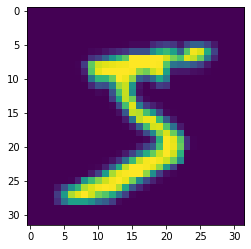

In [ ]:
# Resize training images
X_train_resized = np.empty((60000, 32, 32), dtype = X_train.dtype)
for (k, image) in enumerate(X_train):
    X_train_resized[k] = cv2.resize(image, dsize = (32, 32))
X_train = X_train_resized

# Resize testing images
X_test_resized = np.empty((10000, 32, 32), dtype = X_train.dtype)
for (k, image) in enumerate(X_test):
    X_test_resized[k] = cv2.resize(image, dsize = (32, 32))
X_test = X_test_resized

print("Train shape after being resized: ", X_train_resized.shape)
print("Test shape after being resized: ", X_test_resized.shape)

# Show an image
plt.imshow(X_train_resized[0,:,:])
plt.show()

Next, we will split the training dataset into 2 sets: training and testing. 90% of the data will be put in the training set and 10% will be put in the validation set. 

In [ ]:
# Split train/valid from the training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 5)

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Val shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

Train shape: X_train = (54000, 32, 32), y_train = (54000,)
Val shape: X_val = (6000, 32, 32), y_val = (6000,)
Test shape: X_test = (10000, 32, 32), y_test = (10000,)


## B. VGG16 Model

After loading the images, we will replicate the prespecified VGG16 model. 

In [ ]:
# Initialize VGG16 as an Sequential model
VGG16 = Sequential(name = 'VGG16')

We will follow the architecture of the VGG16 as below:

- Kernel size of all convolutional layers is *3x3*.
- Numbers of filters of every block are sequentially *64, 128, 256, 512, 512*.
- All activation functions are *ReLU*s, except the output layer which uses softmax.
- Dropout probability used after dense layers is *0.5*.
- Assume that the input size is *32x32x1*.

In [ ]:
# Block 1
VGG16.add(Conv2D(filters = 64, input_shape = (32, 32, 1), kernel_size = (3, 3),
                 strides = (1, 1), padding = 'same', activation = 'relu')) 
VGG16.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1),
                 padding = 'same', activation = 'relu'))
VGG16.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'same'))


# Block 2
VGG16.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (1, 1),
                 padding = 'same', activation = 'relu'))
VGG16.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (1, 1),
                 padding = 'same', activation = 'relu'))  
VGG16.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'same'))            
                    
# Block 3
VGG16.add(Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1),
                 padding = 'same', activation = 'relu'))
VGG16.add(Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1),
                 padding = 'same', activation = 'relu'))
VGG16.add(Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1),
                 padding = 'same', activation = 'relu'))
VGG16.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'same'))
                     
# Block 4
VGG16.add(Conv2D(filters = 512, kernel_size = (3, 3), strides = (1, 1),
                 padding = 'same', activation = 'relu'))
VGG16.add(Conv2D(filters = 512, kernel_size = (3, 3), strides = (1, 1),
                 padding = 'same', activation = 'relu'))
VGG16.add(Conv2D(filters = 512, kernel_size = (3, 3), strides = (1, 1),
                 padding = 'same', activation = 'relu'))  
VGG16.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'same'))                   

# Block 5
VGG16.add(Conv2D(filters = 512, kernel_size = (3, 3), strides = (1, 1),
                 padding = 'same', activation = 'relu'))
VGG16.add(Conv2D(filters = 512, kernel_size = (3, 3), strides = (1, 1),
                 padding = 'same', activation = 'relu'))
VGG16.add(Conv2D(filters = 512, kernel_size = (3, 3), strides = (1, 1),
                 padding = 'same', activation = 'relu'))   
VGG16.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2), padding = 'same'))                      
                             
# Flatten
VGG16.add(Flatten()) 

# Fully connected (FC) layers
VGG16.add(Dense(4096, activation = 'relu'))
VGG16.add(Dropout(rate = 0.5)) 
VGG16.add(Dense(4096, activation = 'relu')) 
VGG16.add(Dropout(rate = 0.5))                     
VGG16.add(Dense(1000, activation = 'softmax'))   # Output classes

# Model Summary
VGG16.summary()

Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                         

Then, we compile the model. We will use `Adam` optimizer with default learning rate, *squarse categorical cross entropy* as loss function (since our labels are categorical), and `accuracy` as the main metrics.

In [ ]:
# Compile the model
VGG16.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 5e-4),
              metrics = ['accuracy'])

## C. Model Performance

Before training the model, we will create a callback ModelCheckpoint. This callback will save a better version of the model every time the optimizer finds one. The metric to evalute the model performance is `validation loss`; and the *smaller* the validation loss is, the better the model is.



In [ ]:
# Create a callback ModelCheckpoint
mc = keras.callbacks.ModelCheckpoint(filepath = "epoch-{epoch:02d}.hdf5",
                                     monitor = 'val_loss', mode = 'min',           
                                     verbose = 0, save_best_only = True)

Then, we train the model. We will use a moderate batch size of 512 and use 30 epochs for the model training to obtain the best model as possible.

In [ ]:
# Train the model
history = VGG16.fit(X_train, y_train, batch_size = 1024,
                    epochs = 40, 
                    validation_data = (X_val, y_val), # Validation set
                    callbacks = [mc]) # Use callback ModelCheckpoint during the training

Epoch 1/40
53/53 [==============================] - 57s 581ms/step - loss: 2.8547 - accuracy: 0.1012 - val_loss: 2.3084 - val_accuracy: 0.1080
Epoch 2/40
53/53 [==============================] - 20s 369ms/step - loss: 2.1889 - accuracy: 0.1509 - val_loss: 1.9683 - val_accuracy: 0.2693
Epoch 3/40
53/53 [==============================] - 20s 376ms/step - loss: 1.7643 - accuracy: 0.2859 - val_loss: 1.3489 - val_accuracy: 0.4560
Epoch 4/40
53/53 [==============================] - 20s 383ms/step - loss: 0.8954 - accuracy: 0.6313 - val_loss: 0.5003 - val_accuracy: 0.8288
Epoch 5/40
53/53 [==============================] - 20s 383ms/step - loss: 0.3829 - accuracy: 0.8858 - val_loss: 0.1562 - val_accuracy: 0.9602
Epoch 6/40
53/53 [==============================] - 20s 376ms/step - loss: 0.0946 - accuracy: 0.9749 - val_loss: 0.0607 - val_accuracy: 0.9812
Epoch 7/40
53/53 [==============================] - 20s 378ms/step - loss: 0.0554 - accuracy: 0.9855 - val_loss: 0.0432 - val_accuracy: 0.9870

Let us see the training and validation performance in terms of loss and accuracy.

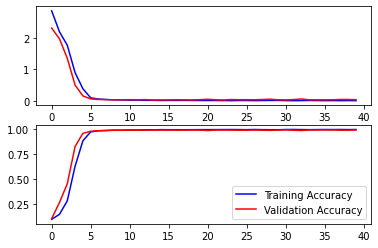

In [ ]:
# Visualize training and validation performance
f,ax = plt.subplots(2,1) 

# Plot training and validation loss
ax[0].plot(history.history['loss'], color = 'b', label = 'Training Loss')
ax[0].plot(history.history['val_loss'], color = 'r', label = 'Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history.history['accuracy'], color = 'b', label = 'Training Accuracy')
ax[1].plot(history.history['val_accuracy'], color = 'r', label = 'Validation Accuracy')

plt.legend()

It is obtained that we have a good model here since the gaps between traning and validation in both graphs converge. Therefore, we predict that the performance on testing set is also the same as training and testing, which is ~100% accuracy.

In [ ]:
# Let us load a saved model and evaluate its performance on the test set
model = tf.keras.models.load_model("/content/epoch-07.hdf5")
result = VGG16.evaluate(X_test, y_test)

# Show the model performance
print(VGG16.metrics_names)
print("Loss and accuracy on the test set: loss = {}, accuracy = {}".format(result[0], result[1]))

313/313 [==============================] - 3s 10ms/step - loss: 0.0451 - accuracy: 0.9922
['loss', 'accuracy']
Loss and accuracy on the test set: loss = 0.04510434716939926, accuracy = 0.9922000169754028


And we obtained 0.99 accuracy, which is a good score.